In [1]:
%matplotlib notebook

In [2]:
import numpy as np
import scipy as sp
import sympy as sym
import matplotlib.pyplot as plt
import sympy as smp
#import seaborn as sns

from IPython.display import YouTubeVideo

In [3]:
from IPython.display import Image
from IPython.core.display import HTML 
#Image(url= "https://upload.wikimedia.org/wikipedia/commons/f/f9/Electron_shell_029_Copper.svg", width=400)

In [4]:
#import sys
#sys.path.append('D:\Dropbox\python\ipython-circuitikz')
%install_ext circuitikz.py

Installed circuitikz.py. To use it, type:
  %load_ext circuitikz


/Users/henkkortier/miniconda3/lib/python3.5/site-packages/IPython/core/magics/extension.py:47: UserWarning: %install_ext` is deprecated, please distribute your extension(s)as a python packages.
  "as a python packages.", UserWarning)


In [5]:
%reload_ext circuitikz

--------

----
# Vraag: Bereken $I_1$ en $I_2$ in het onderstaande circuit:

----

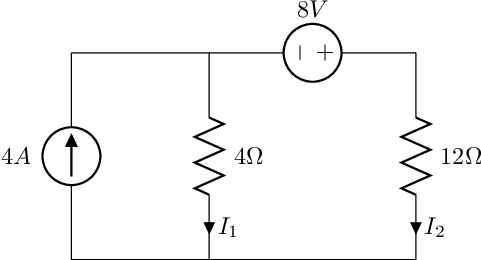

In [6]:
%%circuitikz filename=circuit dpi=175 options=american folder=circuits/6methoden/ replace=false

\begin{circuitikz}
      \draw (0,0)
      to[I,i=$4A$] (0,3) 
      to[short] (2,3)
      to [R, l=$4\Omega$, i=$I_1$] (2,0)
      to[short] (0,0); 
      
      \draw (2,3) 
      to [V, v^=$8V$] (5,3)
      to [R, l=$12\Omega$, i=$I_2$] (5,0);
    
      \draw (5,0)
      to[short] (2,0);
      %to[I,i=$6~A$] (7,0)
      %to[short] (2,0);

    \end{circuitikz}

---
# Oplossing via de 6 methoden:
---

## Links naar de oplossing van de verschillende methoden:

1. [Wet van Ohm](#1.-Wet-van-Ohm)
2. [Wetten van Kirchhoff](#2.-Wetten-van-Kirchhoff)
3. [Super Positie](#3.-Super-Positie)
4. [Norton / Thevenin](#4.-Norton-/-Thevenin)
5. [Lusstromen](#5.-Lusstromen)
6. [Weerstandsmatrx](#6.-Weerstandsmatrix)

---
## 1. Wet van Ohm
---

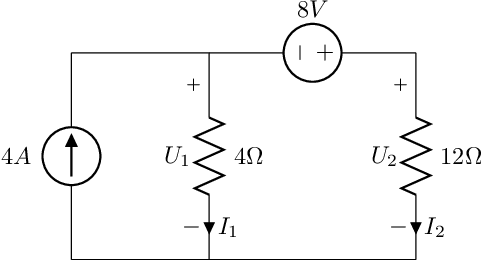

In [7]:
%%circuitikz filename=methode1 dpi=175 options=american folder=circuits/6methoden/ replace=false

\begin{circuitikz}
      \draw (0,0)
      to[I,i=$4A$] (0,3) 
      to[short] (2,3)
      to [R, l=$4\Omega$, i=$I_1$, v=$U_1$] (2,0)
      to[short] (0,0); 
      
      \draw (2,3) 
      to [V, v^=$8V$] (5,3)
      to [R, l=$12\Omega$, i=$I_2$, v=$U_2$] (5,0);
    
      \draw (5,0)
      to[short] (2,0);
      %to[I,i=$6~A$] (7,0)
      %to[short] (2,0);

    \end{circuitikz}

Defineer eerst de spanningen over de weerstanden ($U_1$ en $U_2$).

Gebruik de wet van Ohm om de volgende vergelijking op te stellen:

1. $U_1 = I_1 \cdot 4$
2. $U_2 = I_2 \cdot 12$

    Verder gelden de volgende vergelijkingen:

3. $U_1 + 8 = U_2$
4. $I_1 + I_2 = 4$

Gebruik deze vergelijkingen om ze in elkaar in te vullen:

Eerst [4] in [2]:

$$U_2 = 12(4-I_1)$$

Vervolgens deze nieuwe vergelijking in [3]:

$$U_1 = 12(4-I_1)-8$$

Vervolgens [1] in deze nieuwe vergelijking invullen:

$$U_1 = 12 \left( 4-\dfrac{U_1}{4} \right) -8$$

Levert:

$$U_1 = 10~V$$
$$U_2 = 18~V$$

Dus:
$$I_1 = \dfrac{U_1}{4}=\dfrac{10}{4}=2.5~A$$

en:

$$I_2 = \dfrac{U_2}{4}=\dfrac{18}{12}=1.5~A$$


---
## 2. Wettten van Kirchhoff
---

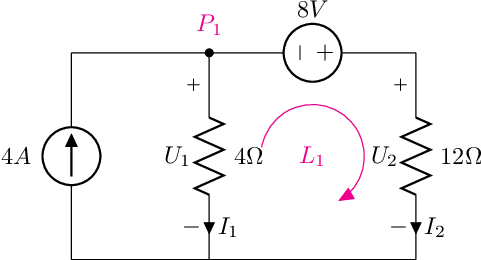

In [8]:
%%circuitikz filename=methode2 dpi=175 options=american folder=circuits/6methoden/ replace=false

\begin{circuitikz}
      \draw (0,0)
      to[I,i=$4A$] (0,3) 
      to[short,-*] (2,3)
      to [R, l=$4\Omega$, i=$I_1$, v=$U_1$] (2,0)
      to[short] (0,0); 
      
      \draw (2,3) 
      to [V, v^=$8V$] (5,3)
      to [R, l=$12\Omega$, i=$I_2$, v=$U_2$] (5,0);
    
      \draw (5,0)
      to[short] (2,0);
      
      \begin{scope}[>=latex,color=magenta,thick,text=magenta]
      \draw[short] (2,3) node[label={above:$P_1$}] {};
      \draw[thin, <-, >=triangle 45] (3.5,1.5)node{$L_1$}  ++(-60:.75) arc (-60:170:.75);
      %\draw[thin, <-, >=triangle 45] (4.5,1.5)node{$L_2$}  ++(-60:.75) arc (-60:170:.75);
      \end{scope}

    \end{circuitikz}

KCL geeft:

$P_1$: $4 - I_1 - I_2 = 0$

KVL geeft:

$L_1$: $-4 I_1 - 8 + 12 I_2 = 0$

2 vergelijkingen met 2 onbekenden oplossen (bijvoorbeeld voor $I_2$). Darvoor vermedigvuldigen we de eerst verkregen KCL vergelijking met 4:

$16 - 4 I_1 - 4 I_2 = 0$

Herschikken en aftrekken van deze vergelijking met de KVL vergelijking:

\begin{array}{ccccr}
  - 4 I_1 & -4 I_2 & +16 & =0 & \\
  - 4 I_1 & +12 I_2 & -8 & =0 & - \\\hline
  & -16 I_2 & +24 & =0 &
\end{array}

Geeft: $I_2 = 1.5~A$

Via de eerste KCL vergelijking vinden we $I_1$:  $4 - I_1 - 1.5 = 0$

Geeft: $I_1 = 2.5~A$

---
## 3. Super Positie
---

Eerst maken we de stroombron actief: 

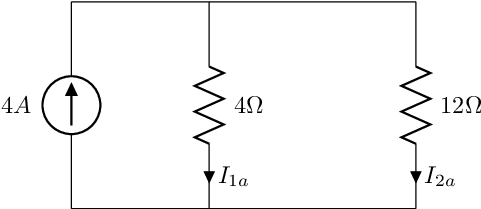

In [9]:
%%circuitikz filename=methode3a dpi=175 options=american folder=circuits/6methoden/ replace=false

\begin{circuitikz}
      \draw (0,0)
      to[I,i=$4A$] (0,3) 
      to[short] (2,3)
      to [R, l=$4\Omega$, i=$I_{1a}$] (2,0)
      to[short] (0,0); 
      
      \draw (2,3) 
      to [short] (5,3)
      to [R, l=$12\Omega$, i=$I_{2a}$] (5,0);
    
      \draw (5,0)
      to[short] (2,0);
      %to[I,i=$6~A$] (7,0)
      %to[short] (2,0);

    \end{circuitikz}

Dit betreft een stroom deler met als uitkomsten:

$$I_{1a} = \dfrac{12}{4+12} 4 = 3~A$$

$$I_{1b} = \dfrac{4}{4+12} 4 = 1~A$$

Vervolgens maken we de spanningsbron actief:

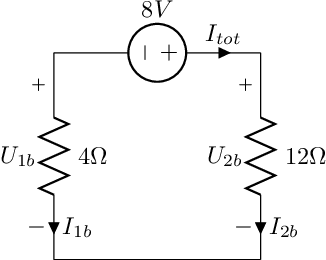

In [10]:
%%circuitikz filename=methode3b dpi=175 options=american folder=circuits/6methoden/ replace=false

\begin{circuitikz}
      %\draw (0,0)
      %to[I,i=$4A$] (0,3) 
      %to[short] (2,3)
      \draw (2,3)
      to [R, l=$4\Omega$, i=$I_{1b}$, v=$U_{1b}$] (2,0);
      %to[short] (0,0); 
      
      \draw (2,3) 
      to [V, v^=$8V$, i=$I_{tot}$] (5,3)
      to [R, l=$12\Omega$, i=$I_{2b}$, v=$U_{2b}$] (5,0);
    
      \draw (5,0)
      to[short] (2,0);
      %to[I,i=$6~A$] (7,0)
      %to[short] (2,0);

    \end{circuitikz}

De totale stroom wordt bepaald door:

$$I_{tot} = I_{2b} = \dfrac{8}{16} = 0.5~A$$

Dus $I_{1b} = -0.5~A$


Vervolgens sommen we de bijdragen op om tot de totaal stroom te komen:

$$I_1=I_{1a}+I_{1b} = 3-0.5=2.5~A$$

$$I_2=I_{2a}+I_{2b} = 1+0.5=1.5~A$$


---
## 4. Norten / Thevenin
---

### Thevenin

Het Thevenin equivalent ziet er als volgt uit:

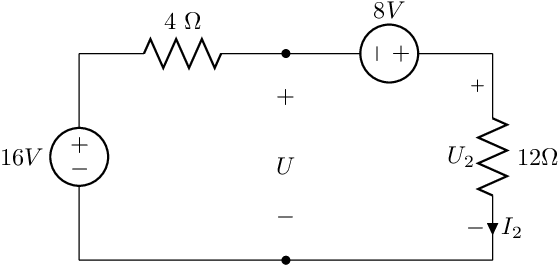

In [11]:
%%circuitikz filename=methode4a dpi=175 options=american folder=circuits/6methoden/ replace=false

\begin{circuitikz}
      \draw (0,0)
      to[V,v=$16V$] (0,3) 
      to[R, l=$4~\Omega$, -*] (3,3);
      %to [R, l=$4\Omega$, i=$I_1$, v=$U_1$] (2,0)
      %to[short] (0,0); 
      
      \draw (3,3) 
      to [V, v^=$8V$] (6,3)
      to [R, l=$12\Omega$, i=$I_2$, v=$U_2$] (6,0);
    
      \draw (6,0)
      to[short, -*] (3,0)
      to[short] (0,0);
    
      \draw[short] (3,2) node[label={above:$+$}] {};
      \draw[short] (3,1) node[label={below:$-$}] {};
      \draw[short] (3,1) node[label=$U$] {};
        
      %to[I,i=$6~A$] (7,0)
      %to[short] (2,0);

    \end{circuitikz}

Er geldt nu:

$$I_2 = \dfrac{16+8}{4+12} = 1.5~A$$

En verder geldt:

$$U = 12*I_2-8 = 12*1.5-8 = 10~V$$

Om nu de originele stroom $I_1$ te bepalen moeten we deze spanning delen door de oorspronkelijke weerstand:

$$I_1 = \dfrac{10}{4} = 2.5~A$$

----
### Norton

Het Norton circuit ziet er als volgt uit:

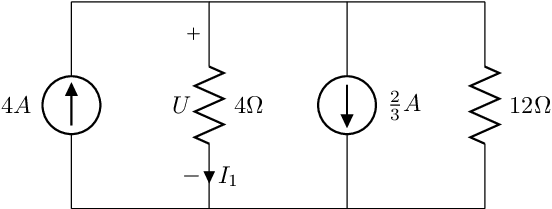

In [12]:
%%circuitikz filename=methode4b dpi=175 options=american folder=circuits/6methoden/ replace=false

\begin{circuitikz}
      \draw (0,0)
      to[I,i=$4A$] (0,3) 
      to[short] (2,3)
      to [R, l=$4\Omega$, i=$I_1$, v=$U$] (2,0)
      to[short] (0,0); 
      
      \draw (2,3) 
      to [short] (6,3)
      to [R, l=$12\Omega$] (6,0);
    
      \draw (6,0)
      to[short] (2,0);
    
      \draw (4,3)
      to[I,i=$\frac{2}{3}A$] (4,0);
    
      %to[I,i=$6~A$] (7,0)
      %to[short] (2,0);

    \end{circuitikz}

De spanning wordt bepaald door de totale stroom vermedigvuldigt met de vervangingsweerstand.

De vervangingsweerstand is $R_{eq} = \frac{48}{16} = 3\Omega$

$$U = \left( 4-\dfrac{2}{3} \right) \cdot 3 = 12-\frac{6}{3} = \frac{30}{3} = 10~V $$

Dus de stromen zijn:

\begin{align}
I_1 &= \dfrac{10}{4} = 2.5~A \\
I_2 &= \dfrac{10+8}{12} = 1.5~A 
\end{align}

---
## 5. Lusstromen
---

Eerst geschikte lussen kiezen en de polariteiten erbij vermelden:

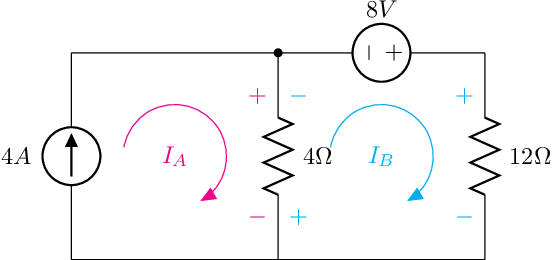

In [13]:
%%circuitikz filename=methode5 dpi=175 options=american folder=circuits/6methoden/ replace=false

\begin{circuitikz}
      \draw (0,0)
      to[I,i=$4A$] (0,3) 
      to[short,-*] (3,3)
      to [R, l=$4\Omega$] (3,0)
      to[short] (0,0); 
      
      \draw (3,3) 
      to [V, v^=$8V$] (6,3)
      to [R, l=$12\Omega$] (6,0);
    
      \draw (6,0)
      to[short] (3,0);
      
      \begin{scope}[>=latex,color=magenta,thick,text=magenta]
      \draw[thin, <-, >=triangle 45] (1.5,1.5)node{$I_A$}  ++(-60:.75) arc (-60:170:.75);
        
      \draw[short] (2.7,2) node[label={above:$+$}] {};
      \draw[short] (2.7,1) node[label={below:$-$}] {};
    
      \end{scope}
      
      \begin{scope}[>=latex,color=cyan,thick,text=cyan]  
      \draw[thin, <-, >=triangle 45] (4.5,1.5)node{$I_B$}  ++(-60:.75) arc (-60:170:.75);
    
      \draw[short] (3.3,2) node[label={above:$-$}] {};
      \draw[short] (3.3,1) node[label={below:$+$}] {};
    
      \draw[short] (5.7,2) node[label={above:$+$}] {};
      \draw[short] (5.7,1) node[label={below:$-$}] {};
    
      \end{scope}

    \end{circuitikz}

Vergelijkingen opstellen:

Lus $I_A$ geeft: $I_A=4$

Lus $I_B$ geeft: $-8+ 12 I_B + 4 I_B - 4 I_A = 0$

geeft $$I_B = \dfrac{8+16}{16} = 1.5~A$$

dan geldt:

\begin{align}
    I_1 &= I_A - I_B = 4 - 1.5 = 2.5~A \\
    I_2 &= I_B = 1.5~A
\end{align}

---
## 6. Weerstandsmatrix
---

Door middel van het toepassen van de wetten van [Kirchhoff](#2.-Wetten-van-Kirchhoff) vonden we twee vergelijkingen:

\begin{align}
4 - I_1 - I_2 &= 0 \\ 
-4 I_1 - 8 + 12 I_2 &= 0
\end{align}

Deze vergelijkingen kunnen we in een matrix vorm zetten:

\begin{equation}
\begin{bmatrix}
1 & 1 \\
1 & -3
\end{bmatrix}
\cdot \begin{bmatrix}I_1 \\ I_2 \end{bmatrix} = \begin{bmatrix} 4 \\ -2 \end{bmatrix}
\end{equation}

Oplossen voor $I_1$ en $I_2$ betekend:

\begin{equation}
\begin{bmatrix}I_1 \\ I_2 \end{bmatrix} =
\begin{bmatrix}
1 & 1 \\
1 & -3
\end{bmatrix}^{-1}
\cdot \begin{bmatrix} 4 \\ -2 \end{bmatrix}
\end{equation}

Om dit op te lossen kan je verschillende algebra pakketten gebruiken (bijvoorbeeld MATLAB/Wolfram alpha/ MAPLE of zoals hier in Python):

In [17]:
A = np.array([[1,1],[1,-3]])
b = np.array([[4],[-2]])

print('I_1 & I_2: \n\n' + str(np.linalg.inv(A).dot(b)))

I_1 & I_2: 

[[ 2.5]
 [ 1.5]]


----